## 'Experimental' Determination of the Neutral Point 

The C$_{m}$ vs. C$_{L}$ data for various locations of the center of gravity (X$_{cg}$) are used to determine the location of the neutral point (X$_{NP}$). The data is imported from a simulation in XFLR5. When the static margin (X$_{NP}$ - X$_{cg}$) is positive the aircraft has longitudinal static stability.

In [1]:
%reset
import pandas as pd
# download pd class from the pandas library

xflr_data=pd.read_csv("Wing_Polar_Graph_1.csv")
# load data from the Wing_Polar_Graph_1.csv file, which was imported from XFLR5

# Wing_Polar_Graph_1.csv contains pitch moment coefficient and lift coefficient generated by XFLR5



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### The 3D model is shown in the figure below. 

<img src = "AET3603-Lab6-3D.png">

In [2]:
xflr_data.head()
# display the first five rows from the data 


,CL,T1-30.0 ft/s-VLM2,,CL,T1-30.0 ft/s-VLM2.1,.1,CL.1,T1-30.0 ft/s-VLM2.2,.2,CL.2,T1-30.0 ft/s-VLM2.3,.3,CL.3,T1-30.0 ft/s-VLM2.4,.4,.5
0,0.139641,0.032712,,0.139641,0.133278,,0.139641,0.064893,,0.139641,0.007306,,0.139641,-0.013260,,
1,0.237592,-0.011561,,0.237592,0.161157,,0.237592,0.043709,,0.237592,-0.055195,,0.237592,-0.090517,,
2,0.335415,-0.056600,,0.335415,0.188468,,0.335415,0.021822,,0.335415,-0.118512,,0.335415,-0.168631,,
3,0.433051,-0.102583,,0.433051,0.214953,,0.433051,-0.000971,,0.433051,-0.182802,,0.433051,-0.247742,,
4,0.530437,-0.149336,,0.530437,0.240646,,0.530437,-0.024541,,0.530437,-0.247857,,0.530437,-0.327613,,


In [3]:
# display names of the columns
xflr_data.columns

Index(['CL', 'T1-30.0 ft/s-VLM2', ' ', ' CL', 'T1-30.0 ft/s-VLM2.1', ' .1',
       ' CL.1', 'T1-30.0 ft/s-VLM2.2', ' .2', ' CL.2', 'T1-30.0 ft/s-VLM2.3',
       ' .3', ' CL.3', 'T1-30.0 ft/s-VLM2.4', ' .4', ' .5'],
      dtype='object')

In [4]:
# keep only the columns with relevant information; drop columns containing blank spaces
xflr_data.drop(columns = [' ',' .1',' .2',' .3',' .4', ' .5'], inplace=True)

In [5]:
# rename the columns
xflr_data.set_axis(['CL-1', 'CM-1','CL-2', 'CM-2','CL-3', 'CM-3','CL-4', 'CM-4', 'CL-5', 'CM-5'],axis = 1, inplace = True)

In [6]:
# display first 5 rows of the data to confirm that the recent changes were implemented
xflr_data.head()


,CL-1,CM-1,CL-2,CM-2,CL-3,CM-3,CL-4,CM-4,CL-5,CM-5
0,0.139641,0.032712,0.139641,0.133278,0.139641,0.064893,0.139641,0.007306,0.139641,-0.013260
1,0.237592,-0.011561,0.237592,0.161157,0.237592,0.043709,0.237592,-0.055195,0.237592,-0.090517
2,0.335415,-0.056600,0.335415,0.188468,0.335415,0.021822,0.335415,-0.118512,0.335415,-0.168631
3,0.433051,-0.102583,0.433051,0.214953,0.433051,-0.000971,0.433051,-0.182802,0.433051,-0.247742
4,0.530437,-0.149336,0.530437,0.240646,0.530437,-0.024541,0.530437,-0.247857,0.530437,-0.327613


In [7]:
# display last 5 rows of the data to confirm that the recent changes were implemented
xflr_data.tail()

,CL-1,CM-1,CL-2,CM-2,CL-3,CM-3,CL-4,CM-4,CL-5,CM-5
4,0.530437,-0.149336,0.530437,0.240646,0.530437,-0.024541,0.530437,-0.247857,0.530437,-0.327613
5,0.627516,-0.196713,0.627516,0.265585,0.627516,-0.048778,0.627516,-0.313504,0.627516,-0.408049
6,0.724227,-0.244388,0.724227,0.290021,0.724227,-0.073377,0.724227,-0.379396,0.724227,-0.488689
7,0.820511,-0.292198,0.820511,0.314072,0.820511,-0.098192,0.820511,-0.445361,0.820511,-0.569350
8,0.916311,-0.340245,0.916311,0.337614,0.916311,-0.123330,0.916311,-0.511494,0.916311,-0.650124


In [8]:
from scipy.optimize import curve_fit
from matplotlib import pyplot
import numpy as np

In [9]:
# define the curve fit function
def func(x, a, b):
    return a * x + b

y = -0.48104 * x + 0.10346


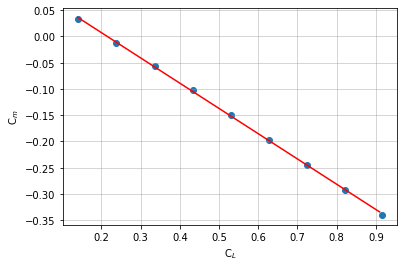

In [10]:
# choose the input and output variables
x, y = xflr_data['CL-1'], xflr_data['CM-1']
# curve fit
popt, _ = curve_fit(func, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x),0.01)
# calculate the output for the range
y_line = func(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '-', color='red')
pyplot.xlabel('C$_{L}$')
pyplot.ylabel('C$_{m}$')
pyplot.grid(b=True, which='both', color='#999999', linestyle='-', alpha=0.5)
pyplot.show()

In [11]:
# given a list of C_L and C_m find the derivative of C_m with respect to C_L
def cm_cl(cl, cm):
    parm, _ = curve_fit(func, cl, cm)
    return parm[0]

In [12]:
# check that the result obtained from cm_cl matches its previously obtained value
cm_cl(xflr_data['CL-1'], xflr_data['CM-1'])

-0.4810414702089798

In [13]:
# obtain the slopes of C_m with respect to C_L for all the cases imported from XFLR5

s1 = cm_cl(xflr_data['CL-1'], xflr_data['CM-1'])
s2 = cm_cl(xflr_data['CL-2'], xflr_data['CM-2'])
s3 = cm_cl(xflr_data['CL-3'], xflr_data['CM-3'])
s4 = cm_cl(xflr_data['CL-4'], xflr_data['CM-4'])
s5 = cm_cl(xflr_data['CL-5'], xflr_data['CM-5'])

In [14]:
slopes = [s1, s2, s3, s4, s5]

In [15]:
# list of cgs obtained from XFLR5

xcgs = [2.027, 4.955, 2.964, 1.287, 0.689]

y = 0.25397 * x + -0.99585


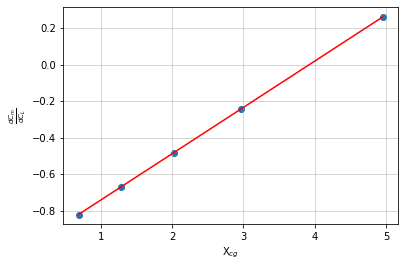

In [16]:
# choose the input and output variables
x, y = xcgs, slopes
# curve fit
popt, _ = curve_fit(func, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x),0.01)
# calculate the output for the range
y_line = func(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '-', color='red')
pyplot.xlabel('X$_{cg}$')
pyplot.ylabel(r'$\frac{dC_{m}}{dC_{L}}$')
pyplot.grid(b=True, which='both', color='#999999', linestyle='-', alpha=0.5)
pyplot.show()

In [17]:
# location of neutral point (the location of the center of gravity for which the moment slope is 0)
-b/a

3.921173423287591